In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt



##import files
data0 = np.loadtxt("null.dat")
data1 = np.loadtxt("1min.dat")
data2 = np.loadtxt("2min.dat")
data4 = np.loadtxt("4min.dat")
data8 = np.loadtxt("8min.dat")

#times
t0 = data0[:,0]
t1 = data1[:,0]
t2 = data2[:,0]
t4 = data4[:,0]
t8 = data8[:,0]


#activities (per s)
N0 = data0[:,1] / 5
N1 = data1[:,1] / 5
N2 = data2[:,1] / 5
N4 = data4[:,1] / 5
N8 = data8[:,1] / 5


##individual error arrays (needed later on for errorbars)
N1err = np.zeros_like(N1)
for i in range(len(N1err)):
    if N1[i] ==0:
        N1err[i] = 1
    else:
        N1err[i] = np.sqrt(N1[i])
        
N2err = np.zeros_like(N2)
for i in range(len(N2err)):
    if N2[i] ==0:
        N2err[i] = 1
    else:
        N2err[i] = np.sqrt(N2[i])

N4err = np.zeros_like(N4)
for i in range(len(N4err)):
    if N4[i] ==0:
        N4err[i] = 1
    else:
        N4err[i] = np.sqrt(N4[i])

N8err = np.zeros_like(N8)
for i in range(len(N8err)):
    if N8[i] ==0:
        N8err[i] = 1
    else:
        N8err[i] = np.sqrt(N8[i])
        



##put all in one array
t = np.concatenate((t0,t1,t2,t4,t8))
N = np.concatenate((N0,N1,N2,N4,N8))
Nerr = np.zeros_like(N)
for i in range(len(Nerr)):
    if N[i] ==0:
        Nerr[i] = 1 #avoid zero errors 
    else:
        Nerr[i] = np.sqrt(N[i])


#functions different cases

def f0(nnull):
    return nnull

def f1(t,na,nb,ta,tb,nnull):
    return na * np.exp(-np.log(2)/ta * t) + nb * np.exp(-np.log(2)/tb * t) + nnull




##function to be optimized
def f(t,na1,na2,na4,na8,nb1,nb2,nb4,nb8,nnull,ta,tb):
    res = np.zeros_like(t)
    for i in range(len(t)):
        if i < len(t0):
            res[i] = f0(nnull)
        elif i < (len(t0)+len(t1)):
            res[i] = f1(t[i],na1,nb1,ta,tb,nnull)
        elif i < (len(t0)+len(t1)+len(t2)):
            res[i] = f1(t[i],na2,nb2,ta,tb,nnull)
        elif i < (len(t0)+len(t1)+len(t2)+len(t4)):
            res[i] = f1(t[i],na4,nb4,ta,tb,nnull)
        elif i < (len(t0)+len(t1)+len(t2)+len(t4)+len(t8)):
            res[i] = f1(t[i],na8,nb8,ta,tb,nnull)
      
    return res

p0 = np.array([500,500,500,500,20,20,20,20,0,10,10])

##optimize that bitch

fit, err = opt.curve_fit(f, t, N, p0,Nerr)
perr = np.sqrt(np.diag(err))
    
print("Parameter:",fit)
print("Parameter Fehler:",perr)
##extract parameters
na1 = fit[0]
na2 = fit[1]
na4 = fit[2]
na8 = fit[3]
nb1 = fit[4]
nb2 = fit[5]
nb4 = fit[6]
nb8 = fit[7]
nnull = fit[8]
ta = fit[9]
tb = fit[10]


##calculate chi^2
##need f that takes a value
def fbla(i):
    res = 0
    if i < len(t0):
        res = f0(nnull)
    elif i < (len(t0)+len(t1)):
        res = f1(t[i],na1,nb1,ta,tb,nnull)
    elif i < (len(t0)+len(t1)+len(t2)):
        res = f1(t[i],na2,nb2,ta,tb,nnull)
    elif i < (len(t0)+len(t1)+len(t2)+len(t4)):
        res = f1(t[i],na4,nb4,ta,tb,nnull)
    elif i < (len(t0)+len(t1)+len(t2)+len(t4)+len(t8)):
        res = f1(t[i],na8,nb8,ta,tb,nnull)
      
    return res

chi2 = 0
for i in range(len(t)):
    chi2 += (fbla(i)-N[i])**2 / (Nerr[i]**2)


#reduced chi2
chi2red = chi2/(len(t)-len(fit))

print("chi2:", chi2)
print("reduziertes chi2:", chi2red)


Parameter: [169.32844443 151.45210216 176.08677584 165.58804951   8.086358
  14.47843788  22.44777553  29.19336977   0.34641882  23.70108672
 121.68092221]
Parameter Fehler: [9.52016759 8.25052314 8.32085029 8.29174803 0.89503247 1.11841294
 1.60670295 2.02520929 0.05319273 0.82735687 4.85233951]
chi2: 123.960984432025
reduziertes chi2: 0.31784867803083333


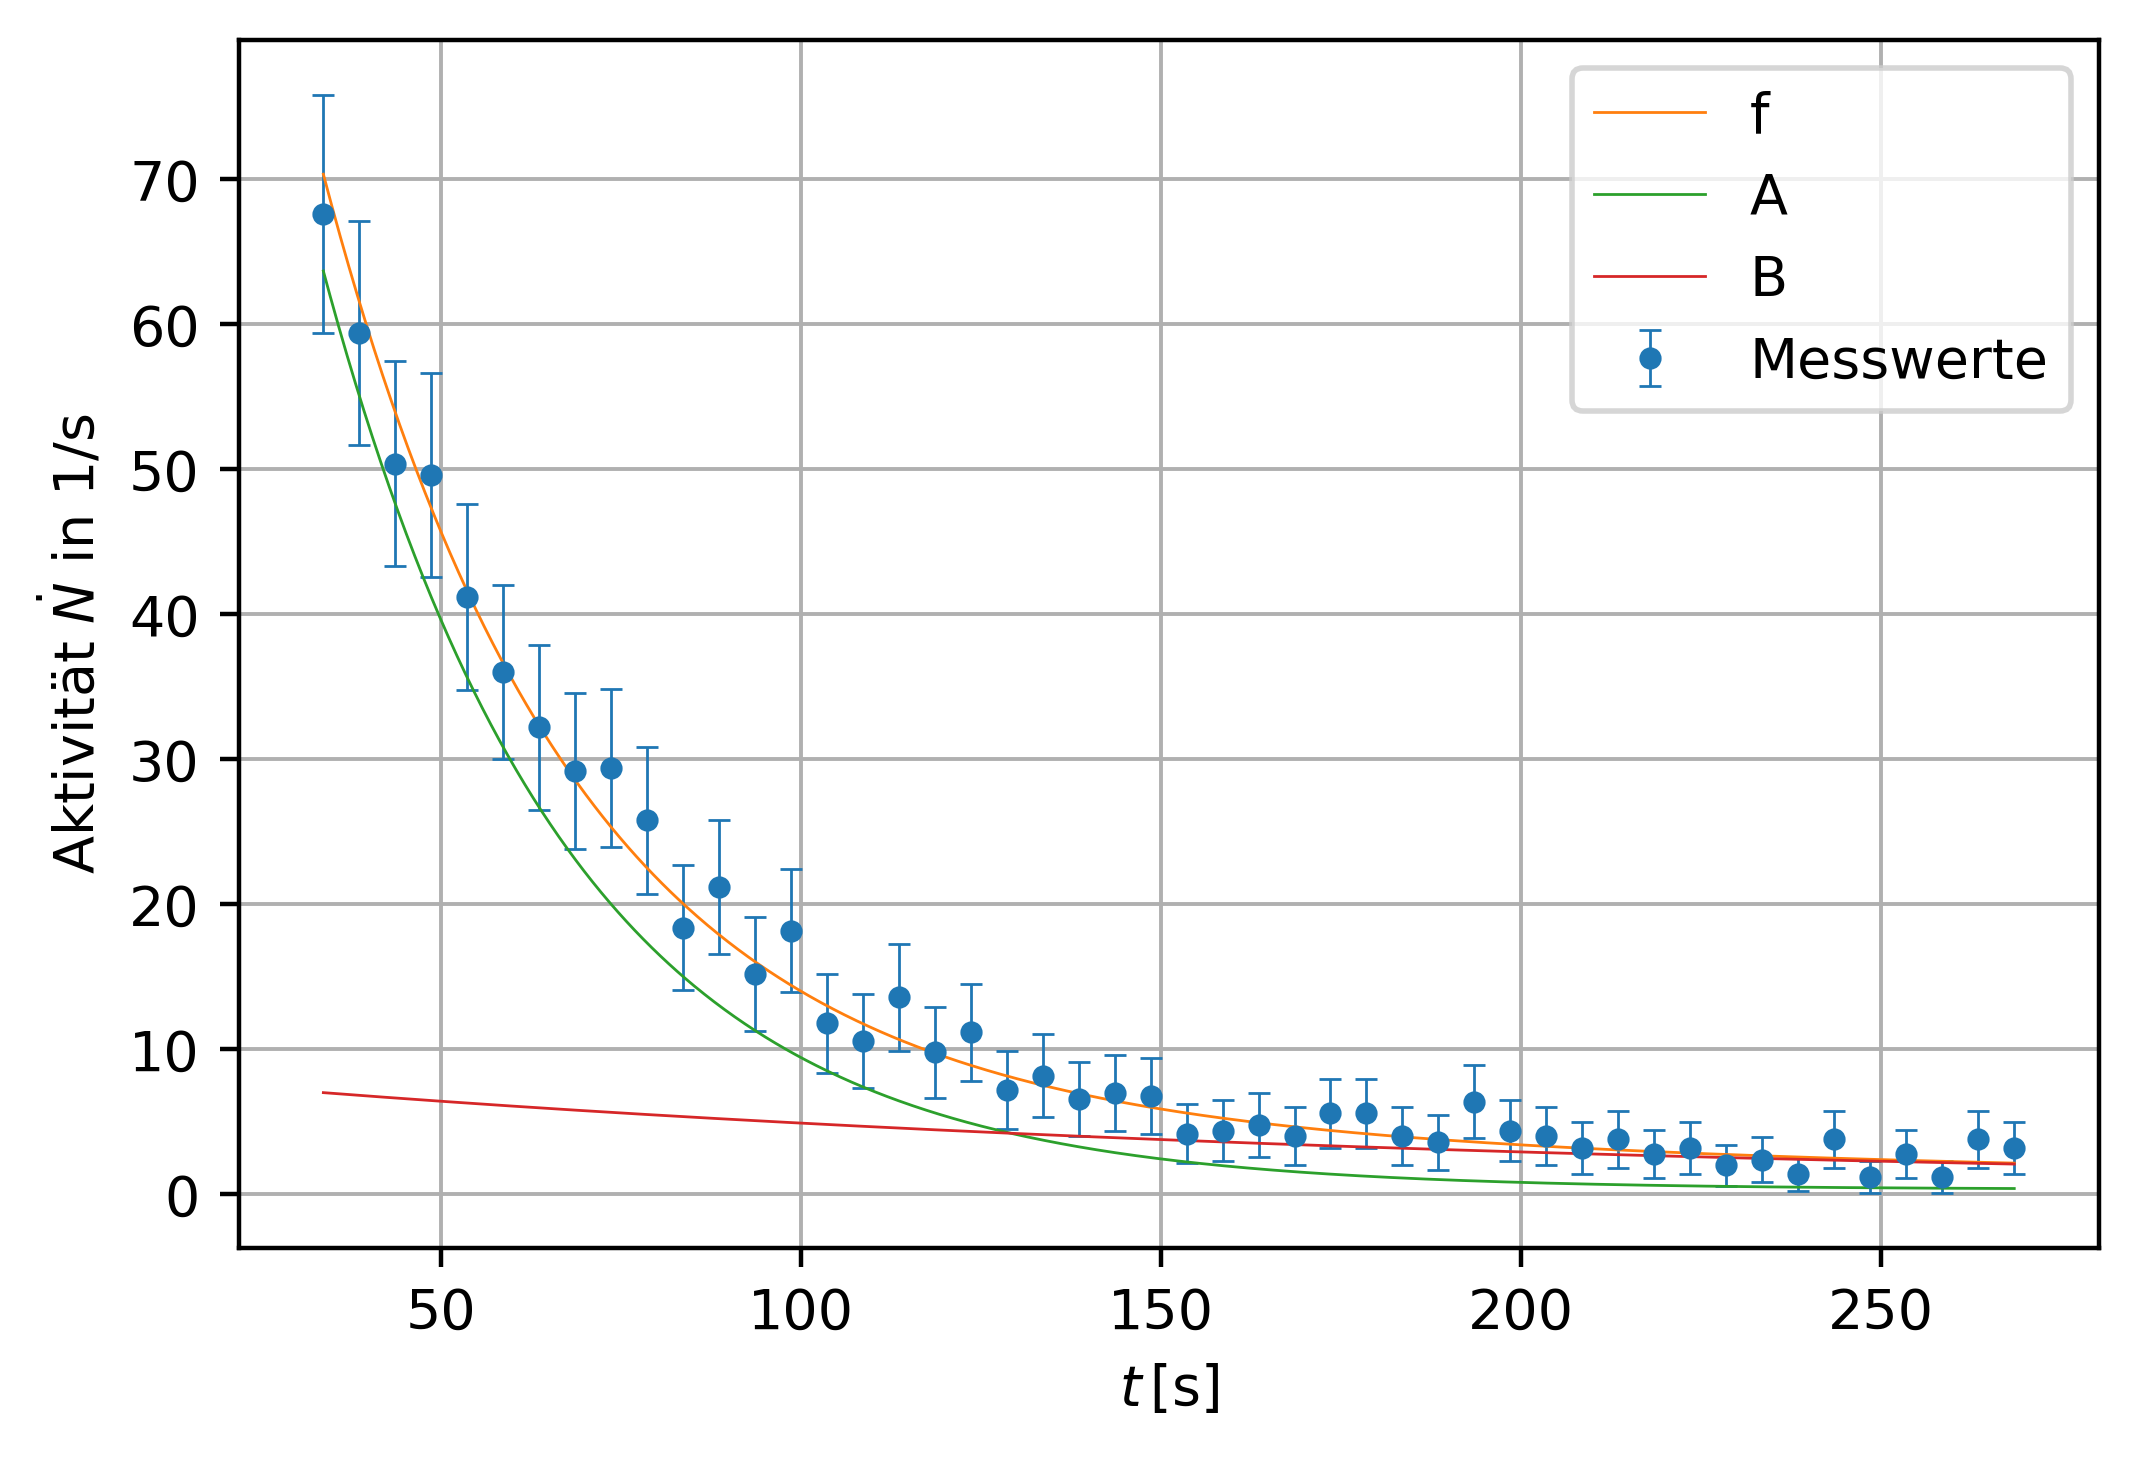

In [2]:
##functions to plot only the respective contribution from A or B
def fa(t,na,ta,nnull):
    return na * np.exp(-np.log(2)/ta * t)  + nnull

def fb(t,nb,tb,nnull):
    return nb * np.exp(-np.log(2)/tb * t)  + nnull

##plots für 1min
x = np.linspace(np.min(t1),np.max(t1),1000)
plt.figure(dpi = 400) #erstellen einer neuen Abbildung
plt.errorbar(t1, N1, yerr=N1err, marker='.', ls='', capsize=2, capthick=0.5, lw=0.5, label="Messwerte") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x, f1(x, na1, nb1,ta,tb,nnull) , label="f",lw = 0.5) #Hiermit wird die Funktion dargestellt
plt.plot(x, fa(x, na1, ta, nnull) , label="A",lw = 0.5) #nur A
plt.plot(x, fb(x, nb1, tb, nnull) , label="B",lw = 0.5) #nur A
#--------------Stil-----------------------
plt.ylabel("Aktivität $\dot{N}$ in 1/s") #x-Beschriftung
plt.xlabel("$t\,$[s]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('decay_1.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots


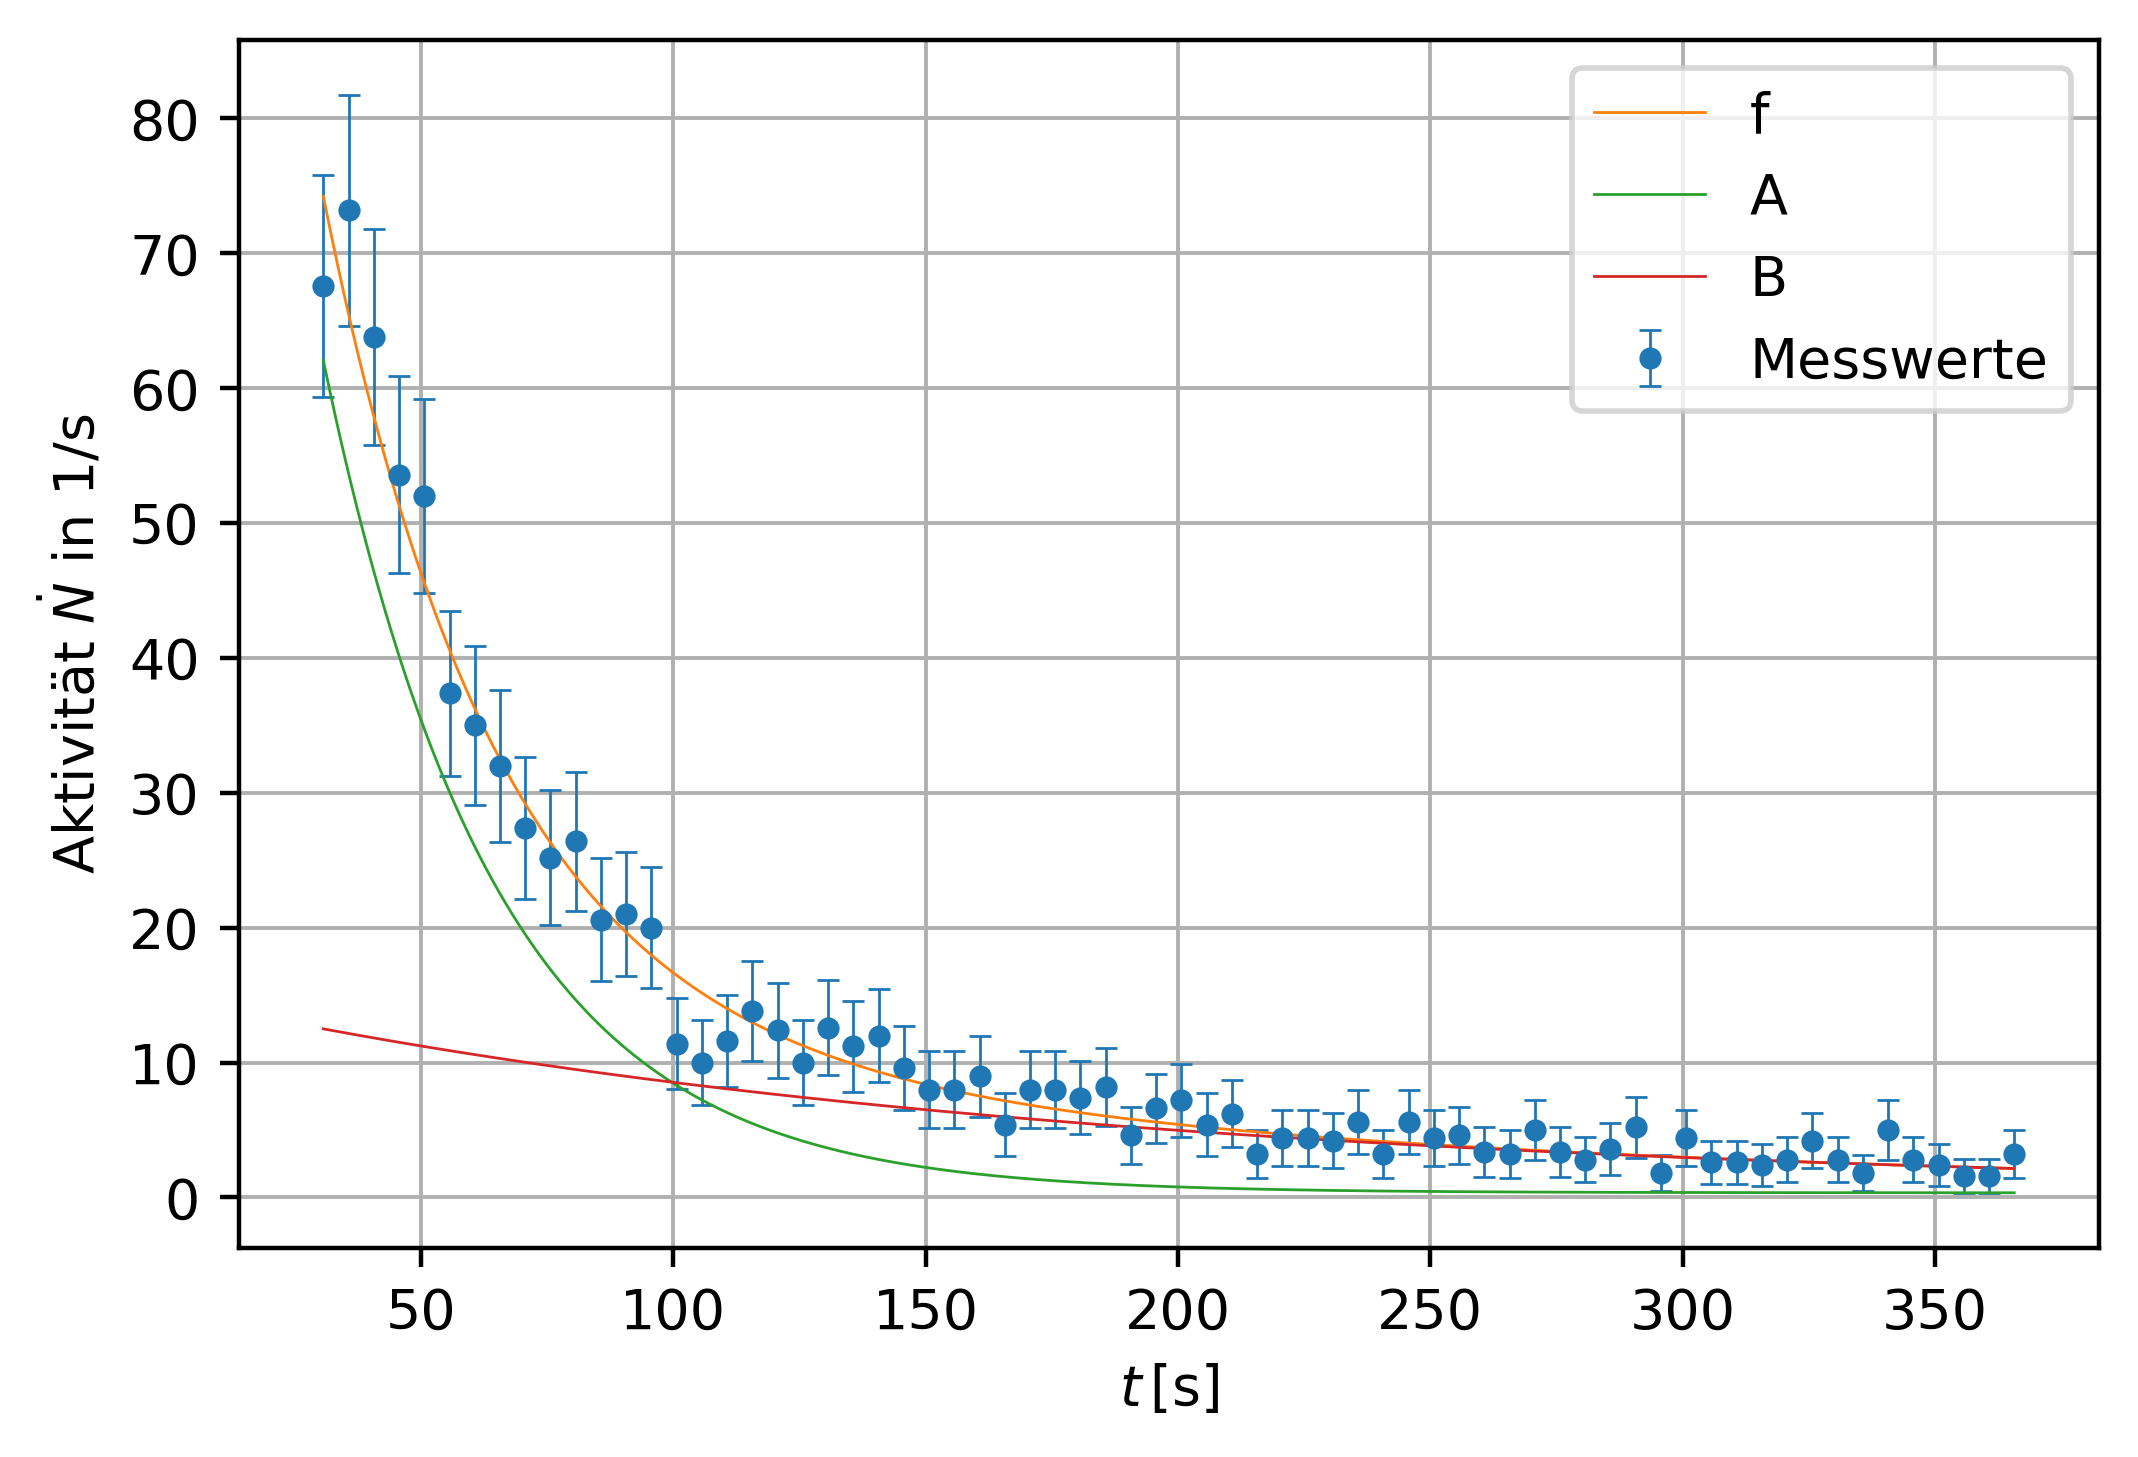

In [3]:
##plots für 2min
x = np.linspace(np.min(t2),np.max(t2),1000)
len(x)
plt.figure(dpi = 400) #erstellen einer neuen Abbildung
plt.errorbar(t2, N2, yerr=N2err, marker='.', ls='', capsize=2, capthick=0.5, lw=0.5, label="Messwerte") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x, f1(x, na2, nb2,ta,tb,nnull) , label="f",lw = 0.5) #Hiermit wird die Funktion dargestellt
plt.plot(x, fa(x, na2, ta, nnull) , label="A",lw = 0.5) #nur A
plt.plot(x, fb(x, nb2, tb, nnull) , label="B",lw = 0.5) #nur A
#--------------Stil-----------------------
plt.ylabel("Aktivität $\dot{N}$ in 1/s") #x-Beschriftung
plt.xlabel("$t\,$[s]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('decay_2.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots


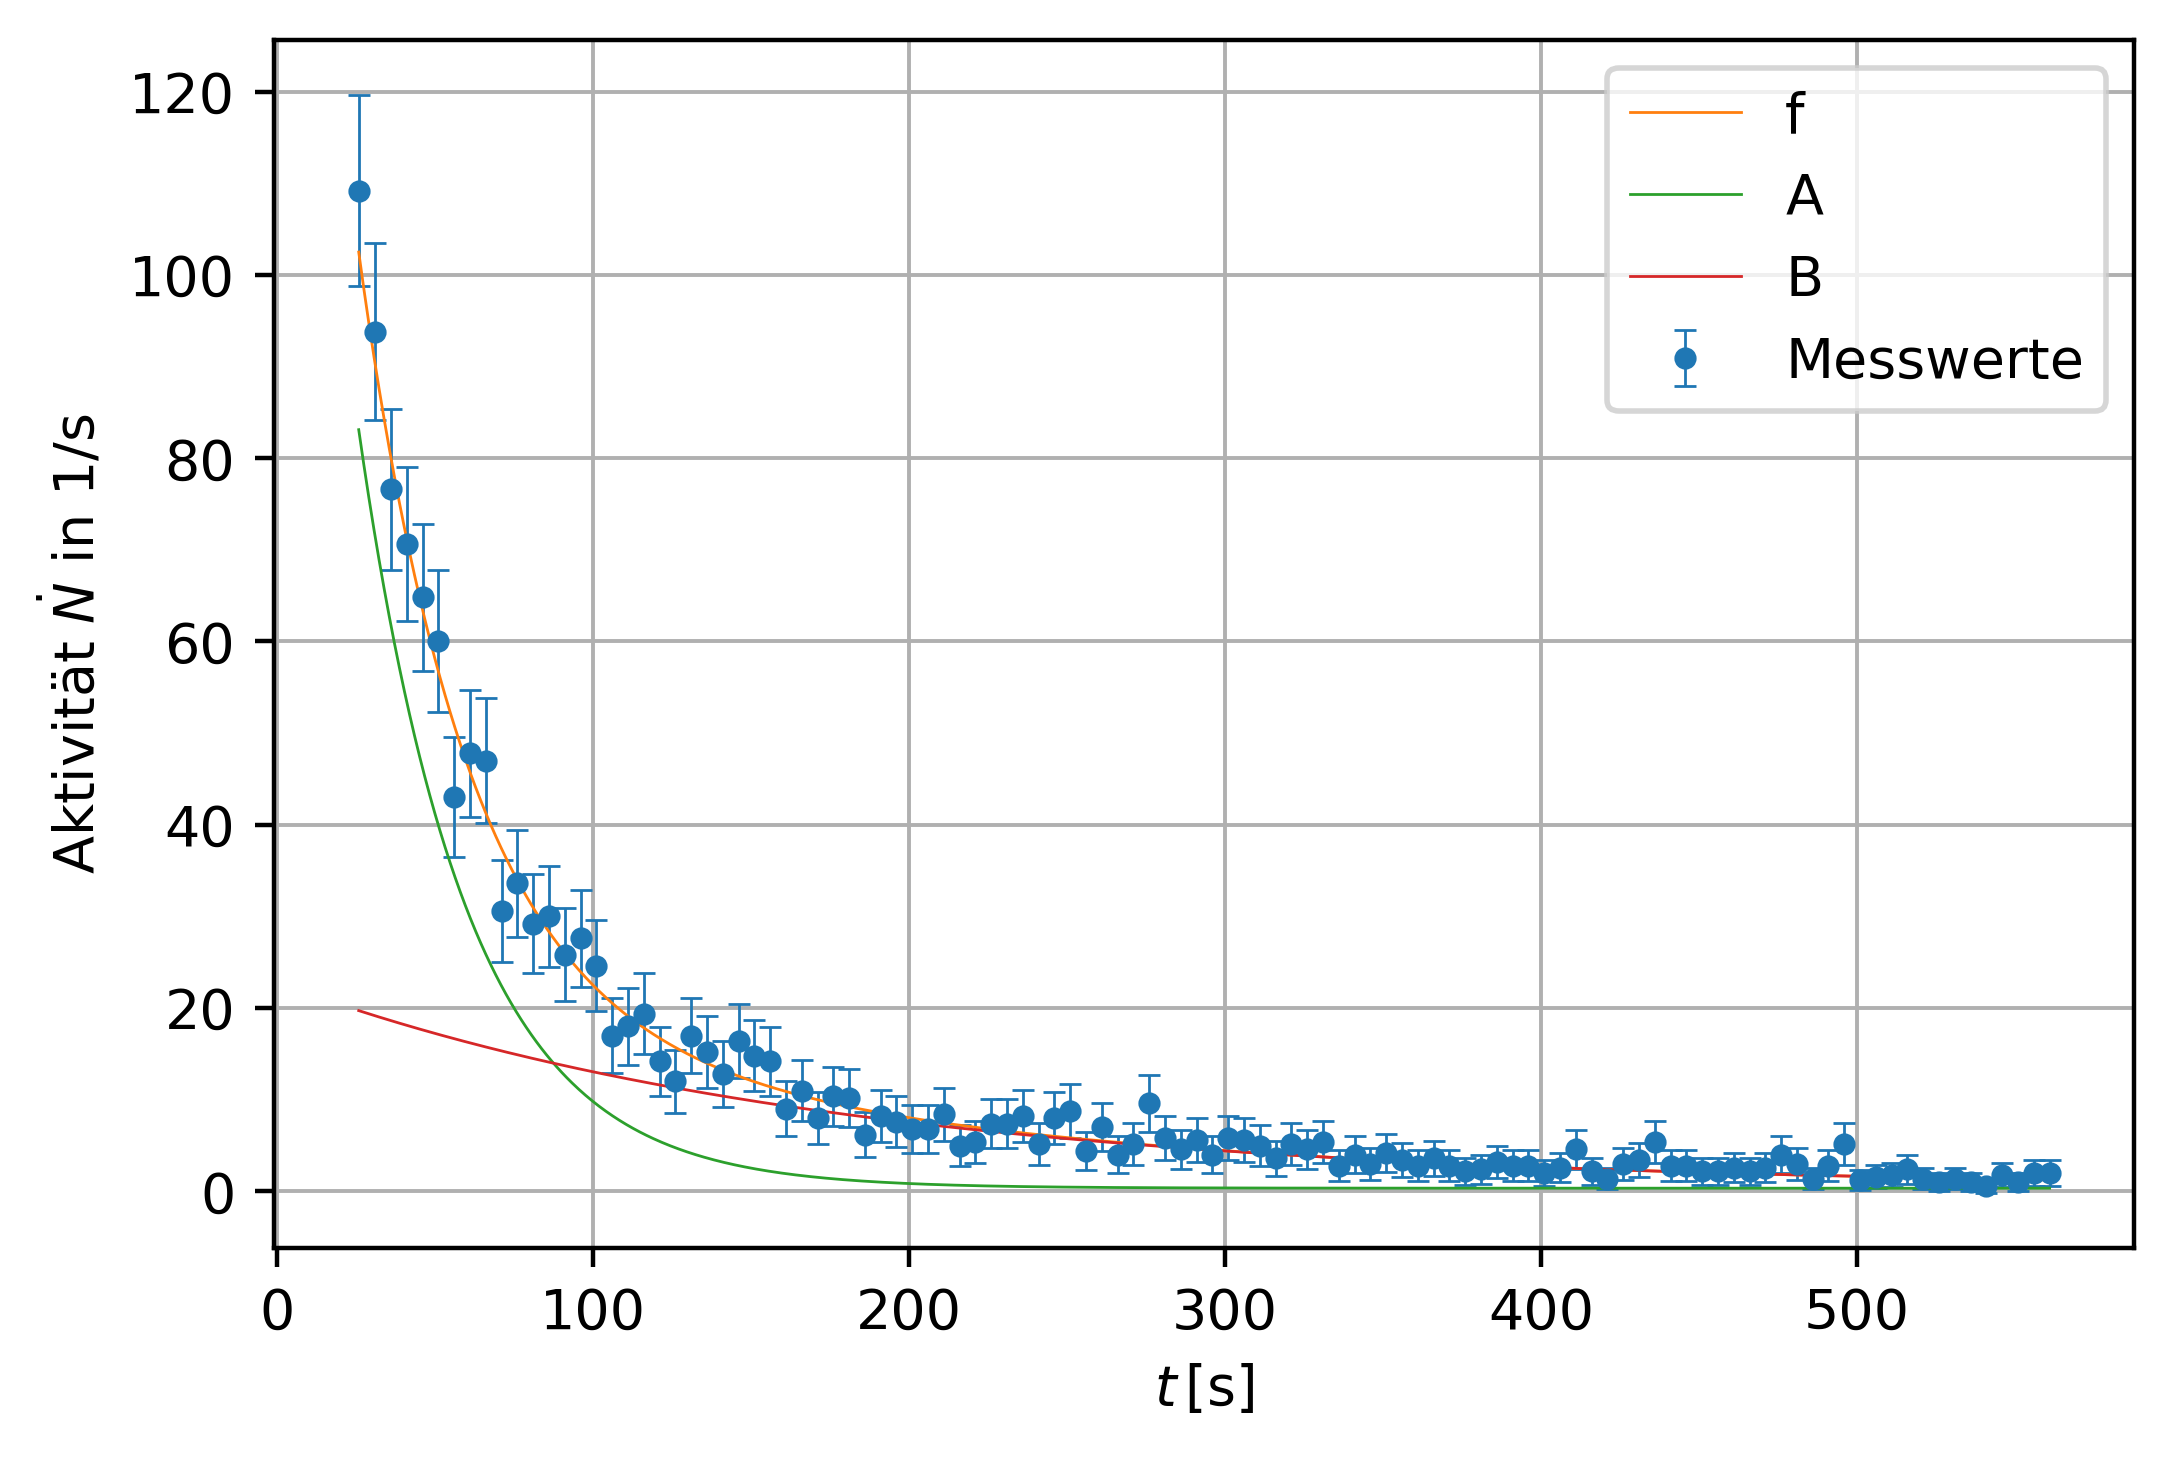

In [4]:
##plots für 4min
x = np.linspace(np.min(t4),np.max(t4),1000)
len(x)
plt.figure(dpi = 400) #erstellen einer neuen Abbildung
plt.errorbar(t4, N4, yerr=N4err, marker='.', ls='', capsize=2, capthick=0.5, lw=0.5, label="Messwerte") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x, f1(x, na4, nb4,ta,tb,nnull) , label="f",lw = 0.5) #Hiermit wird die Funktion dargestellt
plt.plot(x, fa(x, na4, ta, nnull) , label="A",lw = 0.5) #nur A
plt.plot(x, fb(x, nb4, tb, nnull) , label="B",lw = 0.5) #nur A
#--------------Stil-----------------------
plt.ylabel("Aktivität $\dot{N}$ in 1/s") #x-Beschriftung
plt.xlabel("$t\,$[s]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('decay_4.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots

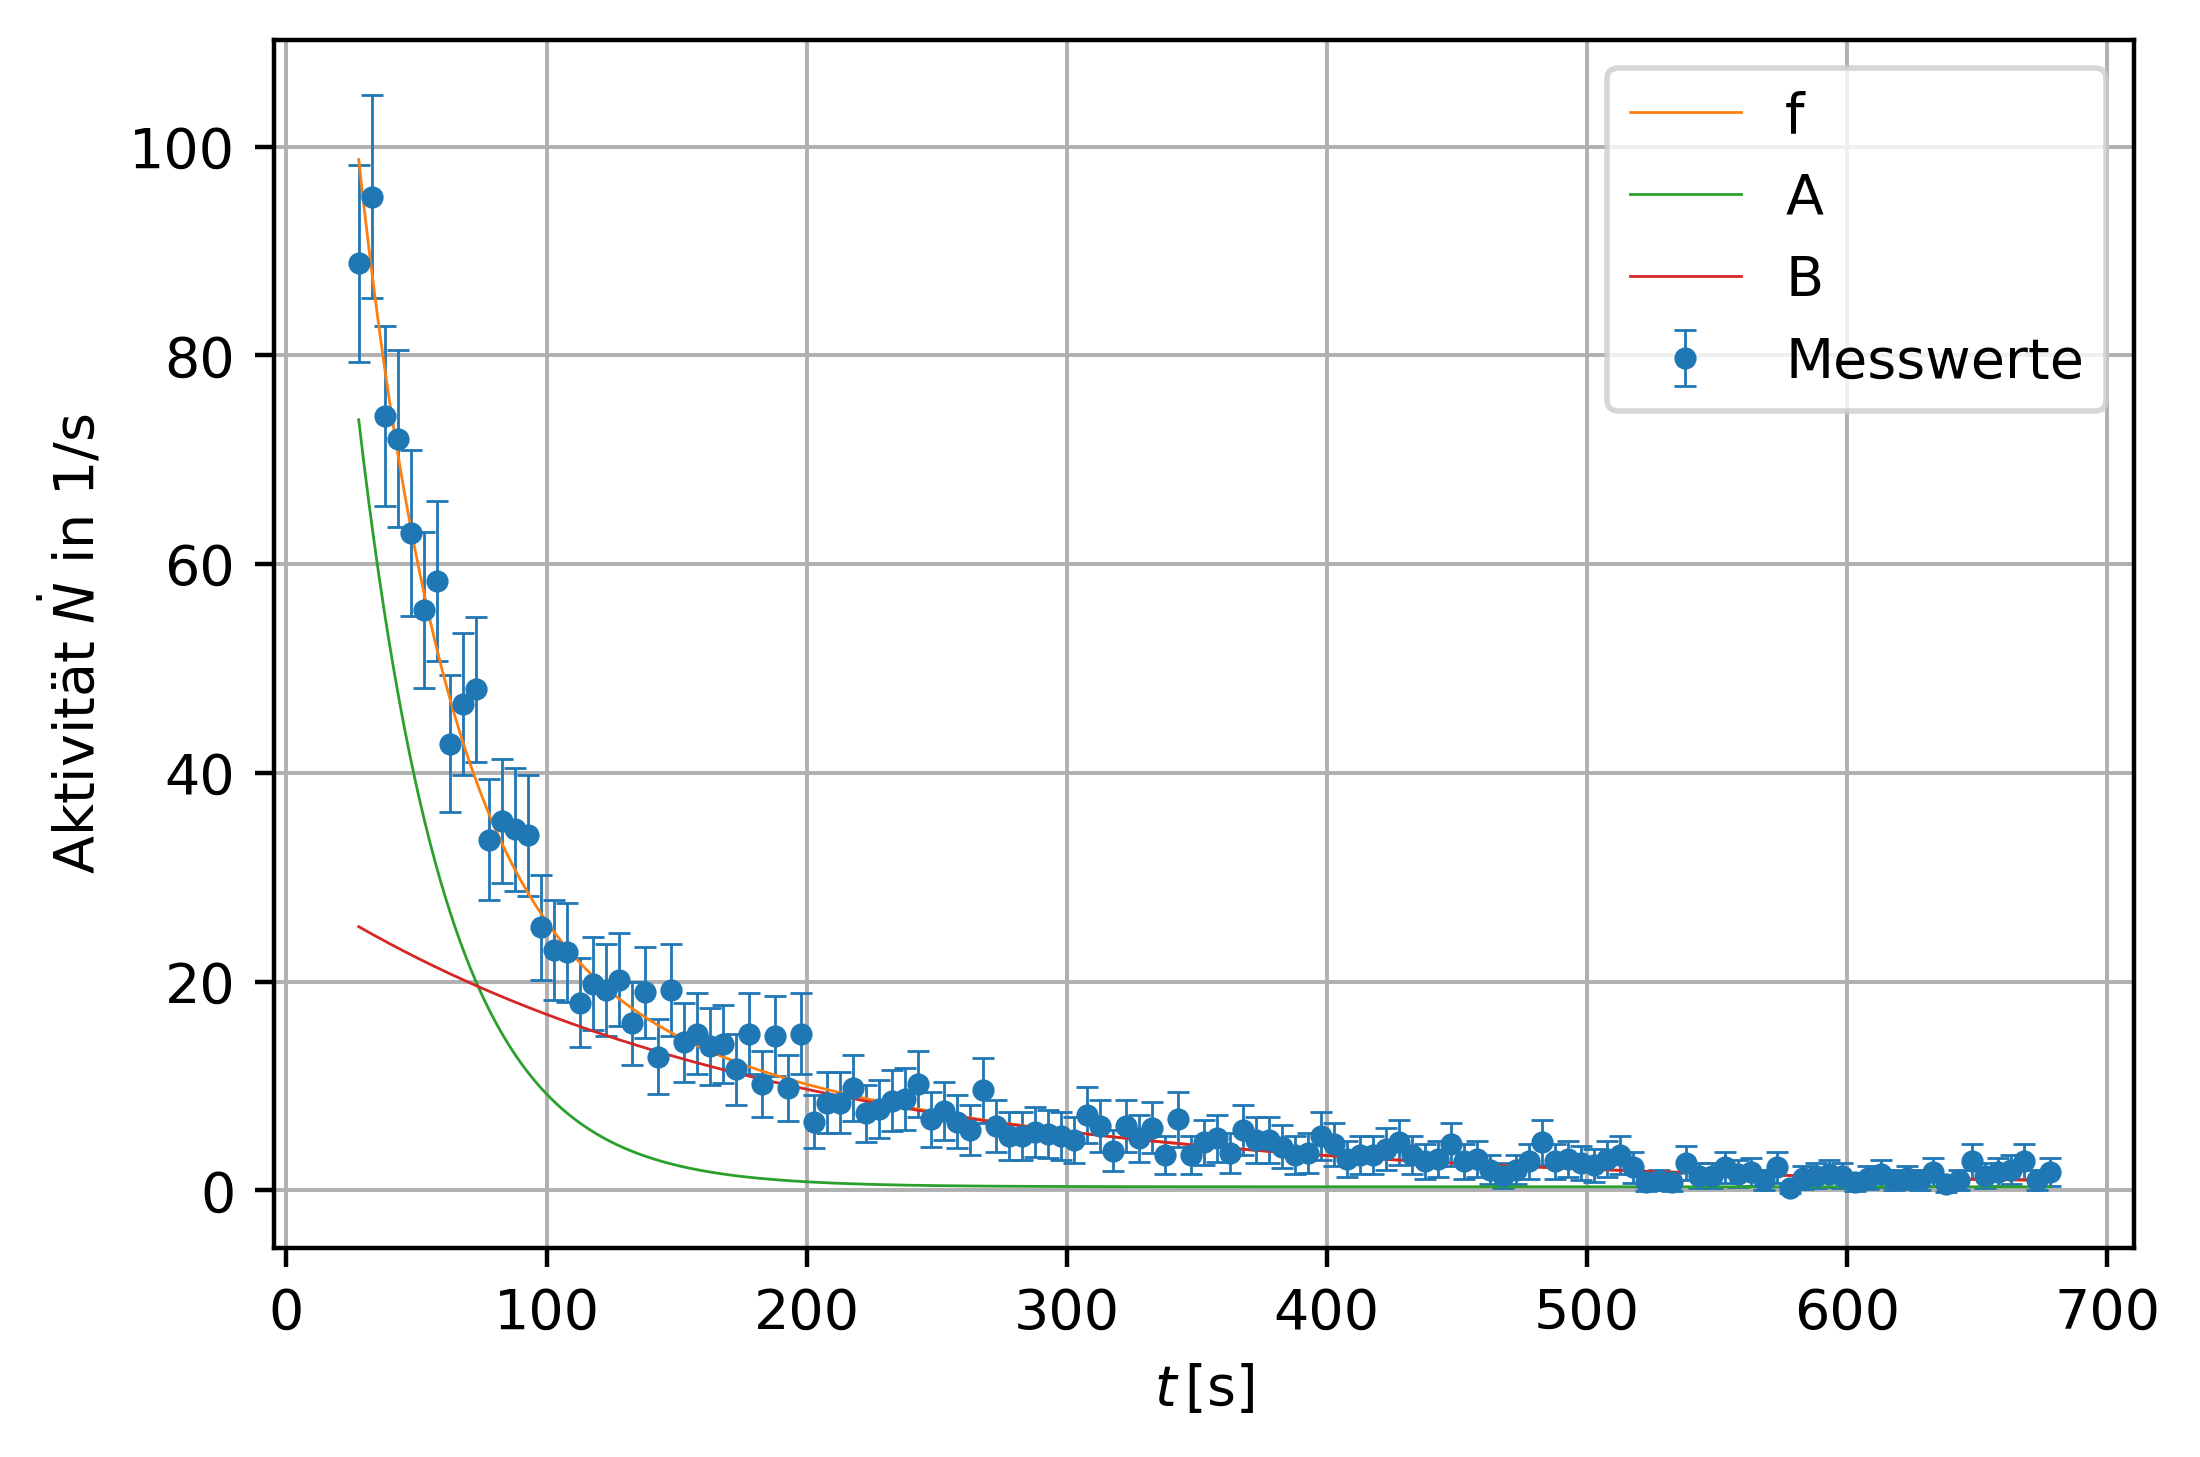

In [5]:
##plots für 8min
x = np.linspace(np.min(t8),np.max(t8),1000)
len(x)
plt.figure(dpi = 400) #erstellen einer neuen Abbildung
plt.errorbar(t8, N8, yerr=N8err, marker='.', ls='', capsize=2, capthick=0.5, lw=0.5, label="Messwerte") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x, f1(x, na8, nb8,ta,tb,nnull) , label="f",lw = 0.5) #Hiermit wird die Funktion dargestellt
plt.plot(x, fa(x, na8, ta, nnull) , label="A",lw = 0.5) #nur A
plt.plot(x, fb(x, nb8, tb, nnull) , label="B",lw = 0.5) #nur A
#--------------Stil-----------------------
plt.ylabel("Aktivität $\dot{N}$ in 1/s") #x-Beschriftung
plt.xlabel("$t\,$[s]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('decay_8.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots